In [5]:
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import silhouette_score 

In [6]:
transactions = pd.read_csv('Transactions.csv')

In [7]:
# Merge data for clustering  
customer_data = transactions.groupby('CustomerID').agg({  
    'TotalValue': 'sum',  
    'Quantity': 'sum'  
}).reset_index() 

In [8]:
# Standardizing the data  
scaler = StandardScaler()  
scaled_data = scaler.fit_transform(customer_data[['TotalValue', 'Quantity']]) 

In [9]:
# KMeans Clustering  
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters as needed  
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)  

In [10]:
# Analyze clusters  
cluster_summary = customer_data.groupby('Cluster').agg({  
    'TotalValue': 'mean',  
    'Quantity': 'mean'  
}).reset_index() 

print(cluster_summary) 

   Cluster   TotalValue   Quantity
0        0  6780.821905  24.190476
1        1  2967.617753  11.258427
2        2  4942.563191  17.255319
3        3  1218.567857   5.142857


In [11]:
score = silhouette_score(scaled_data, customer_data['Cluster'])  
print(f'Silhouette Score: {score}')  

Silhouette Score: 0.44975010590006376


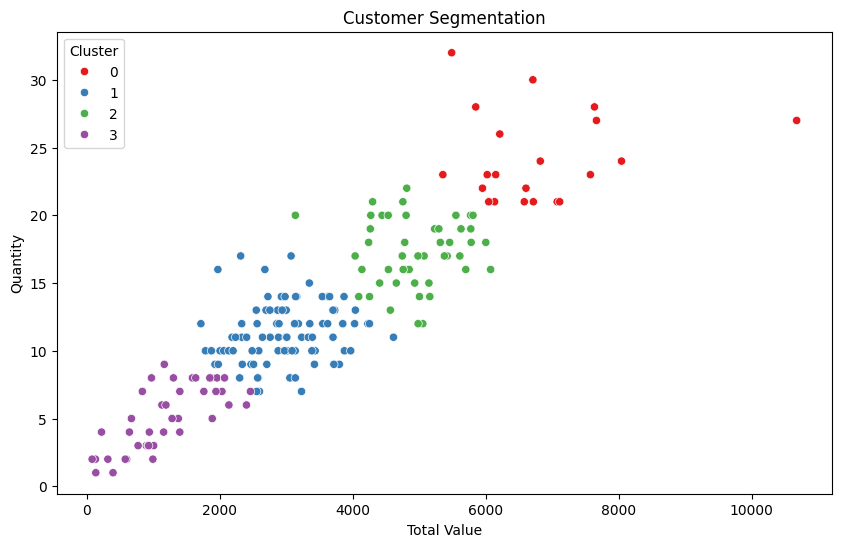

In [12]:
# Optional: Visualize Clusters  
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=customer_data, x='TotalValue', y='Quantity', hue='Cluster', palette='Set1')  
plt.title('Customer Segmentation')  
plt.xlabel('Total Value')  
plt.ylabel('Quantity')  
plt.show()